In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from datetime import datetime
from datetime import date
import matplotlib.pyplot as plt
import re
import requests
pd.options.display.max_rows = 5000 
import warnings
warnings.filterwarnings('ignore')

In [2]:
stocks = ['AHT', 'AV', 'BA', 'GSK', 'HSBA', 'JD', 'NG', 'RDSB', 'RIO', 'SPX', 'TSCO', 'TW', 'ULVR']

In [3]:
def get_dates(lst, start_str, end_str):
    data = pd.read_csv(r'/Users/paxton615/Desktop/Stock_Price_csv/tier_1_stocks/{}.csv'.format(lst[0]))
    data = data.loc[(data['time']>=start_str)&(data['time']<end_str)]
    date = [datetime.fromisoformat(i[:10]) for i in data['time']]
    return(date)

In [4]:
def get_prices(lst,start_str, end_str):   
    new_list = []
    for i in lst:
        data = pd.read_csv(r'/Users/paxton615/Desktop/Stock_Price_csv/tier_1_stocks/{}.csv'.format(i)) # read data from csv 注意文件夹路径和文件名
        df = data[['time','close']]                                          # get time and close price
        df.columns = ['date', i]                                       # change column names
        df.date = [datetime.fromisoformat(i[:10]) for i in df['date']]       # convert dates into datetime
        df = df.loc[(df['date']>=start_str)&(df['date']<end_str)]    # make sure date start from 2016-01-01
        df = df.reset_index(drop=True)
        new_list.append(df[i])
    return(new_list)

In [5]:
date = get_dates(stocks,'2015-01-01','2020-01-01')
prices = get_prices(stocks,'2015-01-01','2020-01-01')

In [6]:
stock_prices = pd.DataFrame(np.array(prices).T, columns=stocks , index=np.array(date).T)
stock_prices.head()

,AHT,AV,BA,GSK,HSBA,JD,NG,RDSB,RIO,SPX,TSCO,TW,ULVR
2015-01-02,1165.0,484.39999,469.20001,1383.0,612.00000,101.600000,908.29999,2235.5,2970.0,2848.0,188.00000,134.89999,2606.0
2015-01-05,1182.0,470.79999,462.00000,1369.5,603.90002,101.400000,909.70001,2128.5,2883.5,2832.0,181.60001,133.80000,2573.0
2015-01-06,1109.0,464.00000,456.70001,1357.0,593.70001,94.400000,896.79999,2121.0,2944.5,2784.0,178.80000,131.10001,2574.0
2015-01-07,1109.0,463.29999,462.70001,1379.0,601.00000,95.159998,917.50000,2148.5,2962.5,2800.0,182.00000,132.39999,2591.0
2015-01-08,1131.0,483.20001,468.89999,1427.5,606.20001,97.000000,932.40002,2200.0,3027.5,2849.0,209.25000,132.80000,2668.0


In [7]:
stock_prices.tail()

,AHT,AV,BA,GSK,HSBA,JD,NG,RDSB,RIO,SPX,TSCO,TW,ULVR
2019-12-23,2433.0,420.39999,577.79999,1815.0,599.00000,832.00000,965.70001,2259.0,4559.0,9065.0,253.00000,191.50000,4429.0
2019-12-24,2437.0,422.60001,578.79999,1817.6,599.40002,834.40002,959.20001,2275.5,4535.0,9055.0,253.39999,192.60001,4389.5
2019-12-27,2446.0,422.20001,579.59998,1818.8,597.79999,844.20001,961.29999,2271.0,4548.5,9125.0,256.00000,194.45000,4416.0
2019-12-30,2405.0,420.20001,566.79999,1798.0,596.29999,832.20001,953.50000,2247.5,4507.0,9020.0,255.50000,194.00000,4373.0
2019-12-31,2414.0,418.70001,564.79999,1779.0,591.90002,837.40002,944.29999,2239.5,4503.0,8890.0,255.20000,193.39999,4350.5


#### Using df to facilitate following steps

In [8]:
df = stock_prices

### covariance

In [9]:
# Log of percentage change, methods: .pct_change()  and  np.log(1+x)
# covariance : .cov()
# 但cov对彼此间的强弱关系度量magnitude不是很直观 
cov_matrix = df.pct_change().apply(lambda x: np.log(1+x)).cov()
cov_matrix.head(2)

,AHT,AV,BA,GSK,HSBA,JD,NG,RDSB,RIO,SPX,TSCO,TW,ULVR
AHT,0.000365,0.000125,0.000100,0.000065,0.000106,0.000090,0.000026,0.000107,0.000154,0.000121,0.000072,0.000120,0.000047
AV,0.000125,0.000228,0.000079,0.000045,0.000102,0.000104,0.000032,0.000084,0.000107,0.000080,0.000106,0.000175,0.000039


### .corr() 直观看到各股之间的correlation

In [10]:
corr_matrix = df.pct_change().apply(lambda x: np.log(1+x)).corr()
corr_matrix.head(2)

,AHT,AV,BA,GSK,HSBA,JD,NG,RDSB,RIO,SPX,TSCO,TW,ULVR
AHT,1.000000,0.434803,0.417014,0.290717,0.436607,0.244262,0.118947,0.36753,0.404094,0.463824,0.215066,0.294437,0.199265
AV,0.434803,1.000000,0.417631,0.254827,0.532805,0.356912,0.182602,0.36652,0.356894,0.386856,0.398520,0.543614,0.210840


### create weights for the portfolio 制定权数

In [11]:
weights = np.full(shape=len(stocks), fill_value=1/len(stocks), dtype=np.float)
colnames = df.columns

print(weights,colnames)

[0.07692308 0.07692308 0.07692308 0.07692308 0.07692308 0.07692308
 0.07692308 0.07692308 0.07692308 0.07692308 0.07692308 0.07692308
 0.07692308] Index(['AHT', 'AV', 'BA', 'GSK', 'HSBA', 'JD', 'NG', 'RDSB', 'RIO', 'SPX',
       'TSCO', 'TW', 'ULVR'],
      dtype='object')


### portfolio variance

In [12]:
port_weights = dict(zip(colnames,weights))

port_var = cov_matrix.mul(port_weights, axis=0).mul(port_weights, axis=1).sum().sum()

port_var # seems like the variance of the portfolio is very low

8.279508798695496e-05

### each stocks' mean return in certain amount of years

In [13]:
df.resample('Y').last()

,AHT,AV,BA,GSK,HSBA,JD,NG,RDSB,RIO,SPX,TSCO,TW,ULVR
2015-12-31,1119.0,516.00000,499.60001,1373.0,536.20001,208.20000,937.50000,1543.0,1979.5,3283.0,149.50000,203.10001,2926.5
2016-12-31,1580.0,486.39999,591.50000,1562.0,656.90002,317.89999,951.59998,2354.0,3158.5,4184.0,206.85001,153.50000,3292.5
2017-12-31,1992.0,506.50000,573.00000,1322.5,766.90002,336.20001,875.09998,2508.5,3942.0,5620.0,209.25000,206.39999,4125.5
2018-12-31,1637.0,375.50000,459.20001,1491.2,646.90002,348.79999,764.20001,2340.0,3730.0,6240.0,190.10001,136.25000,4108.5
2019-12-31,2414.0,418.70001,564.79999,1779.0,591.90002,837.40002,944.29999,2239.5,4503.0,8890.0,255.20000,193.39999,4350.5


In [14]:
stock_mean_return = df.resample('Y').last().pct_change().mean() 
stock_mean_return

AHT     0.242293
AV     -0.039908
BA      0.046008
GSK     0.076222
HSBA    0.037765
JD      0.505686
NG      0.010898
RDSB    0.120278
RIO     0.249281
SPX     0.288164
TSCO    0.161537
TW      0.044997
ULVR    0.108211
dtype: float64

#### calculate the portfolio returns, by adding the weights on each stock

这里有一个与之前计算不同的地方，按每年末价格计算，年均portfolio_return = 0.1424

但是，之前，按每天来做cumulative来计算，年均portfolio_return = 0.224

之前还用末年和初年，仅两年的数据算过一个数据，年均portfolio_return = 0.1467

### 第一个数据与第三个数据基本吻合，证明计算过程应该没有问题。是两种计算方式，产生了差距。需要继续验证那种方式更加准确。

In [15]:
portfolio_return = (weights * stock_mean_return).sum()
portfolio_return

0.14241779270863694

#### calculate volatility is given by the annual standard deviation. Multiply by 250 because there are 250 trading days/year.

In [16]:
ann_sd = df.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(250))
ann_sd

AHT     0.301952
AV      0.238651
BA      0.198753
GSK     0.186321
HSBA    0.201516
JD      0.304766
NG      0.181236
RDSB    0.241384
RIO     0.314986
SPX     0.215461
TSCO    0.277396
TW      0.336443
ULVR    0.194253
dtype: float64

#### Creating a table for visualising returns and volatility of assets


In [17]:
assets = pd.concat([stock_mean_return, ann_sd], axis=1) 
assets.columns = ['Returns', 'Volatility']
assets 

,Returns,Volatility
AHT,0.242293,0.301952
AV,-0.039908,0.238651
BA,0.046008,0.198753
GSK,0.076222,0.186321
HSBA,0.037765,0.201516
JD,0.505686,0.304766
NG,0.010898,0.181236
RDSB,0.120278,0.241384
RIO,0.249281,0.314986
SPX,0.288164,0.215461


#### Plotting the efficient frontier

Efficient frontier is a graph with ‘returns’ on the Y-axis and ‘volatility’ on the X-axis. It shows us the maximum return we can get for a set level of volatility, or conversely, the volatility that we need to accept for certain level of returns.


In [18]:
p_ret = [] # Define an empty array for portfolio returns
p_vol = [] # Define an empty array for portfolio volatility
p_weights = [] # Define an empty array for asset weights,cumulative sum must be 1

num_assets = len(df.columns)
num_portfolios = 10000 # Run 10000 times

In [19]:
weights = np.random.random(num_assets)
# weights = weights/np.sum(weights)
# p_weights.append(weights)

In [20]:
len(df.columns)

13

In [21]:
(weights/weights.sum()).sum()

1.0

In [22]:
for portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights = weights/np.sum(weights)
    p_weights.append(weights)
    returns = np.dot(weights, stock_mean_return) # Returns are the product of individual expected returns of asset and its weights
    p_ret.append(returns)
    
    var = cov_matrix.mul(weights, axis=0).mul(weights, axis=1).sum().sum()# Portfolio Variance
    sd = np.sqrt(var) # Daily standard deviation
    ann_sd = sd*np.sqrt(250) # Annual standard deviation = volatility
    p_vol.append(ann_sd)
    
# 10000 times needs approximately 15 seconds

In [23]:
data = {'Returns':p_ret, 'Volatility':p_vol}

for counter, symbol in enumerate(df.columns.tolist()):
    #print(counter, symbol)
    data[symbol+' weight'] = [w[counter] for w in p_weights]

In [24]:
portfolios  = pd.DataFrame(data)
portfolios.head() # Dataframe of the 10000 portfolios created

,Returns,Volatility,AHT weight,AV weight,BA weight,GSK weight,HSBA weight,JD weight,NG weight,RDSB weight,RIO weight,SPX weight,TSCO weight,TW weight,ULVR weight
0,0.126479,0.136388,0.041405,0.063746,0.046019,0.132117,0.070150,0.035981,0.155255,0.040488,0.085900,0.125086,0.078816,0.068392,0.056646
1,0.150159,0.152309,0.110346,0.085052,0.062754,0.039072,0.017061,0.073327,0.072415,0.107127,0.106780,0.062056,0.065199,0.110631,0.088180
2,0.129327,0.136221,0.085957,0.001153,0.131189,0.135832,0.018843,0.041548,0.128854,0.046769,0.010660,0.070307,0.157942,0.055732,0.115212
3,0.166717,0.150065,0.053960,0.108834,0.010779,0.057592,0.062541,0.134889,0.113010,0.006050,0.139621,0.048701,0.133040,0.062258,0.068725
4,0.135214,0.150257,0.110671,0.098565,0.107108,0.048446,0.036496,0.110099,0.091152,0.108375,0.004570,0.012053,0.098759,0.106495,0.067212


In [25]:
portfolios.describe()

,Returns,Volatility,AHT weight,AV weight,BA weight,GSK weight,HSBA weight,JD weight,NG weight,RDSB weight,RIO weight,SPX weight,TSCO weight,TW weight,ULVR weight
count,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.142588,0.147657,7.639813e-02,0.075858,0.076851,0.077328,0.076694,0.077206,0.077785,0.076386,0.077676,0.076428,0.077421,0.076771,0.077198
std,0.023449,0.006178,4.445585e-02,0.044197,0.044416,0.044834,0.044662,0.044333,0.044104,0.044518,0.044204,0.043996,0.044369,0.044372,0.044399
min,0.067078,0.130731,8.361157e-08,0.000005,0.000022,0.000003,0.000017,0.000022,0.000025,0.000004,0.000012,0.000063,0.000017,0.000011,0.000006
25%,0.126336,0.143270,3.904957e-02,0.039060,0.040030,0.039960,0.039773,0.040224,0.041530,0.038892,0.040918,0.039635,0.039601,0.040275,0.040188
50%,0.142813,0.147151,7.611723e-02,0.075235,0.076892,0.077574,0.076374,0.077227,0.078487,0.076587,0.078191,0.076296,0.078251,0.076170,0.077287
75%,0.158178,0.151551,1.108267e-01,0.110146,0.111211,0.111971,0.111089,0.111602,0.111671,0.110751,0.111892,0.110783,0.112286,0.110893,0.111856
max,0.230651,0.180524,2.586494e-01,0.239744,0.269021,0.245547,0.249904,0.249114,0.249398,0.273062,0.258554,0.249125,0.241854,0.227882,0.225268


#### Find the maxium return portfolio

In [26]:
max_rtn = pd.DataFrame(portfolios.iloc[portfolios['Returns'].idxmax()])
max_rtn.iloc[:2]

,5727
Returns,0.230651
Volatility,0.151245


In [27]:
max_rtn.columns[0]

5727

In [28]:
max_rtn.iloc[2:].sort_values(by=[max_rtn.columns[0]], ascending=False)

,5727
RIO weight,0.198982
SPX weight,0.193199
JD weight,0.178556
GSK weight,0.098342
TSCO weight,0.084500
BA weight,0.073352
NG weight,0.054086
HSBA weight,0.031353
RDSB weight,0.029827
ULVR weight,0.023118


#### Find the lowest volatility portfolio

In [29]:
min_vol = pd.DataFrame(portfolios.iloc[portfolios['Volatility'].idxmin()])
min_vol.iloc[:2]

,3901
Returns,0.127420
Volatility,0.130731


In [30]:
min_vol.iloc[2:].sort_values(by=[min_vol.columns[0]], ascending=False)

,3901
NG weight,0.137940
SPX weight,0.129518
ULVR weight,0.125215
BA weight,0.118355
GSK weight,0.117201
HSBA weight,0.079965
RIO weight,0.064291
TSCO weight,0.055760
JD weight,0.052708
TW weight,0.044848


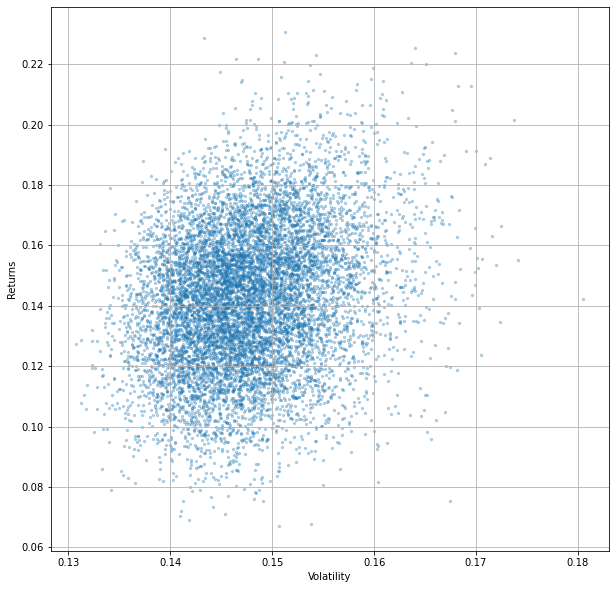

In [31]:
# Plot efficient frontier
portfolios.plot.scatter(x='Volatility', y='Returns', marker='o', s=5, alpha=0.3, grid=True, figsize=[10,10]);

In [32]:
max_rtn.iloc[0]

5727    0.230651
Name: Returns, dtype: float64

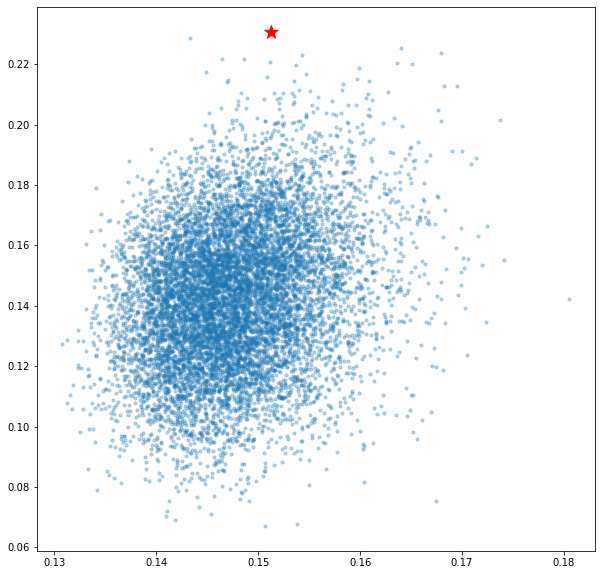

In [33]:
# plotting the maxium return portfolio
plt.subplots(figsize=[10,10])
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3);
plt.scatter(max_rtn.iloc[1], max_rtn.iloc[0], color='r', marker='*', s=200);

In [34]:
min_vol_port = portfolios.iloc[portfolios['Volatility'].idxmin()]
# idxmin() gives us the minimum value in the column specified.                               
min_vol_port

Returns        0.127420
Volatility     0.130731
AHT weight     0.007490
AV weight      0.036818
BA weight      0.118355
GSK weight     0.117201
HSBA weight    0.079965
JD weight      0.052708
NG weight      0.137940
RDSB weight    0.029891
RIO weight     0.064291
SPX weight     0.129518
TSCO weight    0.055760
TW weight      0.044848
ULVR weight    0.125215
Name: 3901, dtype: float64

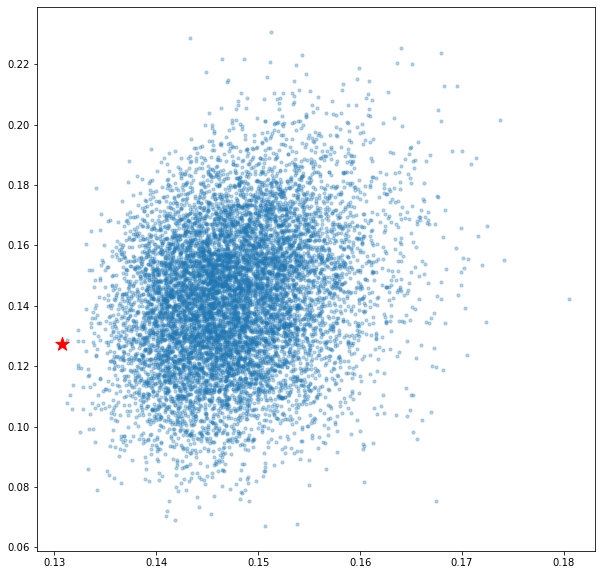

In [35]:
# plotting the minimum volatility portfolio
plt.subplots(figsize=[10,10])
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3);
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=200);

#### Sharpe Ratio

Sharpe Ratio is the average return earned in excess of the risk-free rate per unit of volatility or total risk. Volatility is a measure of the price fluctuations of an asset or portfolio.


In [36]:
# Finding the optimal portfolio
rf = 0.01 # risk factor
optimal_risky_port = portfolios.iloc[((portfolios['Returns']-rf)/portfolios['Volatility']).idxmax()]
optimal_risky_port

Returns        0.228649
Volatility     0.143255
AHT weight     0.052764
AV weight      0.001524
BA weight      0.016401
GSK weight     0.106545
HSBA weight    0.008244
JD weight      0.233795
NG weight      0.106529
RDSB weight    0.034402
RIO weight     0.067112
SPX weight     0.136162
TSCO weight    0.064501
TW weight      0.028285
ULVR weight    0.143734
Name: 1454, dtype: float64

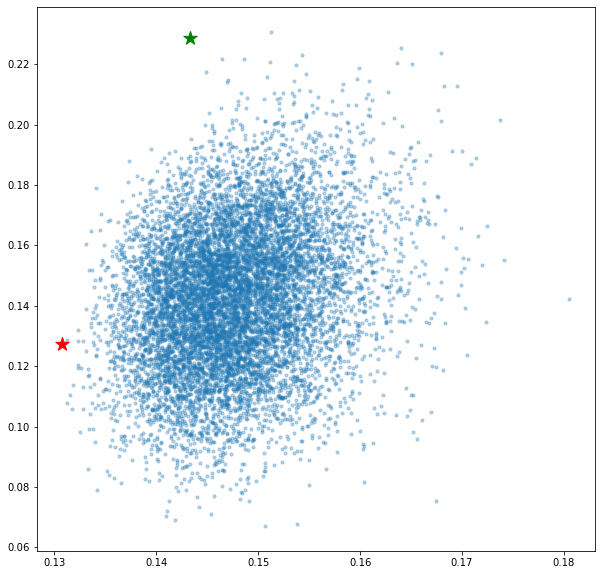

In [37]:
# Plotting optimal portfolio
plt.subplots(figsize=(10, 10))
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3);
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=200);
plt.scatter(optimal_risky_port[1], optimal_risky_port[0], color='g', marker='*', s=200);

In [38]:
optimal_risky_port = pd.DataFrame(optimal_risky_port)
optimal_risky_port.iloc[:2]

,1454
Returns,0.228649
Volatility,0.143255


In [39]:
optimal_risky_port.iloc[2:].sort_values(by = optimal_risky_port.columns[0], ascending=False)

,1454
JD weight,0.233795
ULVR weight,0.143734
SPX weight,0.136162
GSK weight,0.106545
NG weight,0.106529
RIO weight,0.067112
TSCO weight,0.064501
AHT weight,0.052764
RDSB weight,0.034402
TW weight,0.028285
